In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.datasets import  make_classification
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython import display

import copy
import random
import time

Это игрушечно -исследовательское задание
Перед Вами задача бинарной классификации. Как модель мы будем использывать двуслойный перцептрон.
Изучите, как отрабатывают различные оптимизаторы на этой задаче. Обязательно попробовать  Adam, RMSProp, SGD, L-BFGS. Другие тоже можно

Сделать выводы по полученным результатам.

In [2]:
#  Делаем рандомную задачу бинарной классификации. По умолчанию make_classification порождает объект с 20 признаками. 
# Это значение можно варьировать. И его надо подавать как input_size в моддель
X, Y = make_classification(n_samples=200)

# Делим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

# перегоняем все в торч
x_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)

x_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

In [3]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

(torch.Size([160, 20]),
 torch.Size([40, 20]),
 torch.Size([160]),
 torch.Size([40]))

In [4]:
# Cтроим простой перцептрончик: Один линейный слой потом Релу (что это такое, кстати?=)), еще линейный слой и сигмоиду, которая будет выдавать вероятности классов
# hidden size можно варьировать. input_size - кол-во признаков в объекте

class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size

        self.linear1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        hidden = self.linear1(x)
        relu = self.relu(hidden)
        output = self.linear2(relu)
        output = self.sigmoid(output)
        return output

In [23]:
def Graph_For_Each(optimizer, n_epochs=200, batch_size=8, train="TRAIN", test="TEST", closure=False):
    sns.set()

    epoch_array = []
    epoch_test_array = []
    for epoch in range(n_epochs):

        # Тут игрушечный пример как делить на батчи
        permutation = torch.randperm(x_train.size()[0])
        loss_array = []

        if closure:
            def closure():
                optimizer.zero_grad()

                # Бьем на батчи. В таком мигрушечном примере это не обязательно, но мы будем делать все по феншую
                indices = permutation[i:i+batch_size]
                batch_x, batch_y = x_train[indices], y_train[indices]

                # Считаем лосс и добавляем его значение в массив
                outputs = model.forward(batch_x)
                loss = criterion(outputs.squeeze(), batch_y)

                loss_array.append(loss.item())
                loss.backward()

                return loss
                
            model.train()
            for i in range(0,x_train.size()[0], batch_size):
                optimizer.step(closure)
        else: 
            model.train()
            for i in range(0,x_train.size()[0], batch_size):

                #  your code here 
                optimizer.zero_grad()

                # Бьем на батчи. В таком мигрушечном примере это не обязательно, но мы будем делать все по феншую
                indices = permutation[i:i+batch_size]
                batch_x, batch_y = x_train[indices], y_train[indices]

                # Считаем лосс и добавляем его значение в массив
                outputs = model.forward(batch_x)
                loss = criterion(outputs.squeeze(), batch_y)

                loss_array.append(loss.item())
                loss.backward()


                #  your code here 
                optimizer.step()

        # Будем проверять как отрабатывает модель на тестовом датасете (ЗАЧЕМ?)
        # ТАк еж разбиваем на батчи, считаем лосс, но веса модели не обновляем
        test_permutation = torch.randperm(x_test.size()[0])
        loss_test_array = []
        model.eval()
        for i in range(0,x_test.size()[0], batch_size):

            indices = test_permutation[i:i+batch_size]
            batch_x, batch_y = x_test[indices], y_test[indices]
            outputs = model.forward(batch_x)
            loss = criterion(outputs.squeeze(), batch_y)
            loss_test_array.append(loss.item())

        # усредняем лосс на обучении и тесте по эпохе  и выводим график
        epoch_array.append(np.mean(loss_array))
        epoch_test_array.append(np.mean(loss_test_array))

        display.clear_output(wait=True)
        plt.figure(figsize =(12, 7))
        plt.plot(epoch_array, label =train)
        plt.plot(epoch_test_array, label =test)
        plt.legend(loc="best", fontsize=20)
        plt.show()

In [26]:
# модель
model = MLP(20, 10)

# Критерий/ функция потерь
criterion = torch.nn.BCELoss()

# Оптимизаторы. Можете потыкать все из торча. обязательно Adam, RMSProp, SGD, L-BFGS
optimizerAdam = torch.optim.Adam(model.parameters(), lr=0.0001)
optimizerRMSProp = torch.optim.RMSprop(model.parameters(), lr=0.0001)
optimizerSGD = torch.optim.SGD(model.parameters(), lr=0.0001)
optimizerLBFGS = torch.optim.LBFGS(model.parameters(), lr=0.0001)

ОПИШИТЕ ПОЛУЧЕНННЫЕ РЕЗУЛЬТАТЫ

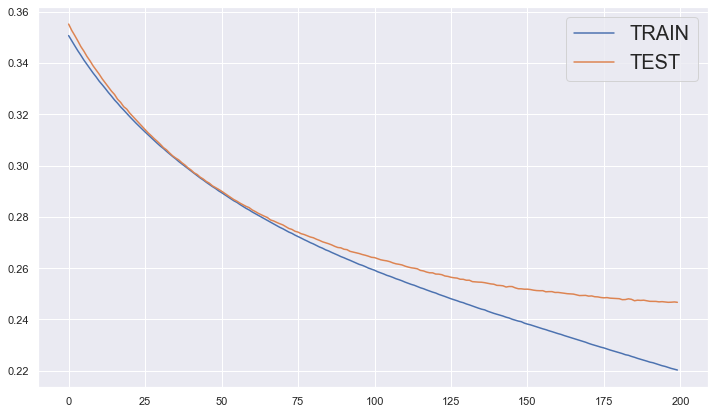

In [101]:
Graph_For_Each(optimizerAdam, 200, 4)

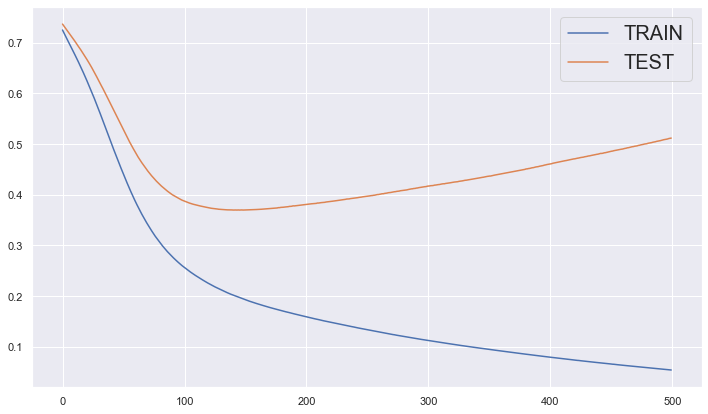

In [10]:
Graph_For_Each(optimizerAdam, 500, 2)

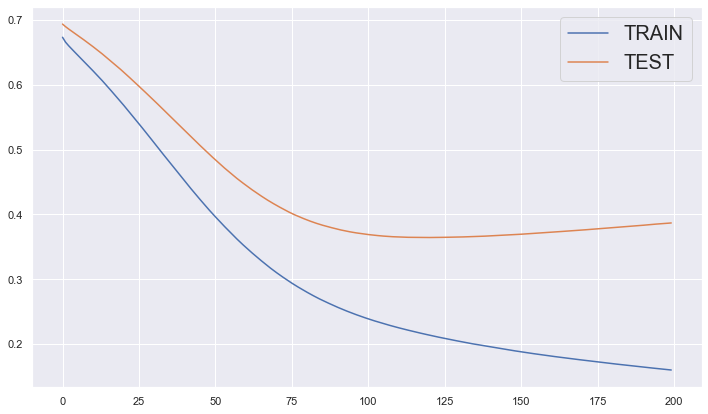

In [8]:
Graph_For_Each(optimizerRMSProp, 200, 2)

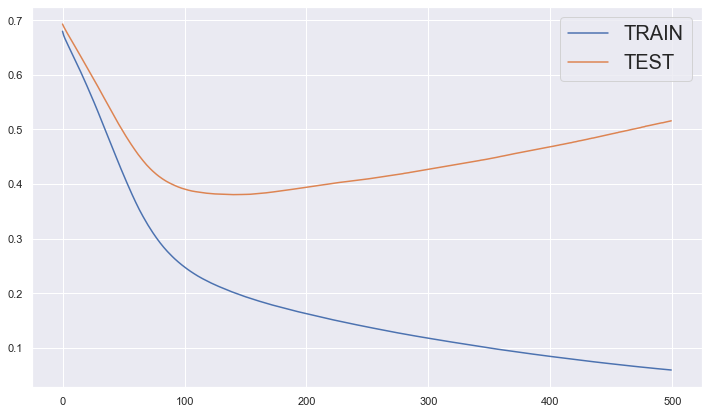

In [12]:
Graph_For_Each(optimizerRMSProp, 500, 2)

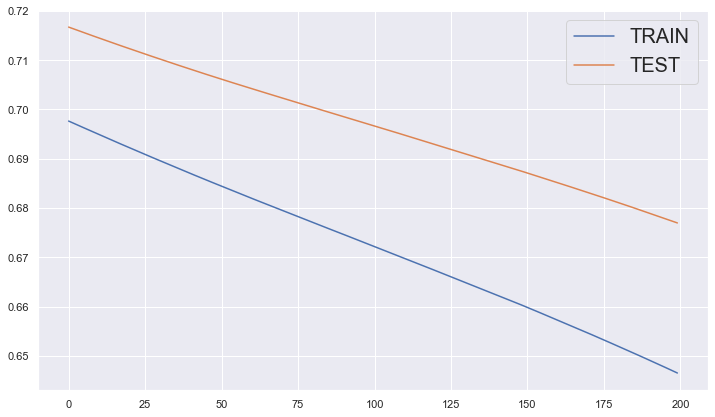

In [14]:
Graph_For_Each(optimizerSGD, 200, 2)

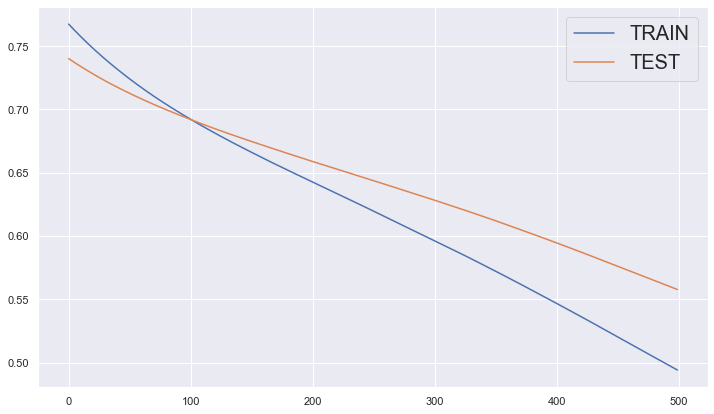

In [16]:
Graph_For_Each(optimizerSGD, 500, 2)

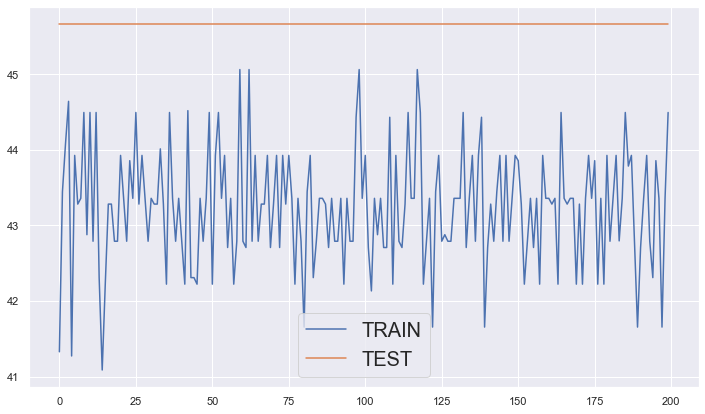

In [25]:
Graph_For_Each(optimizerLBFGS, 200, 2, closure=True)

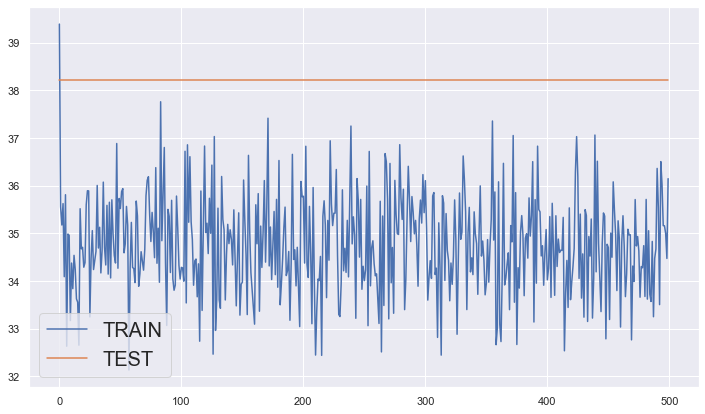

In [27]:
Graph_For_Each(optimizerLBFGS, 500, 4, closure=True)

При перезпуске графики довольно сильно менялись, но в общем можно было заметить, что вне зависимости от параметров Adam и RMSProp сначала ссходятся как надо, но потом начинают расходится. SGD же в свою очередь ведёт себя лучше всех, но иногда получаются две паралельные прямые, а в LBFGS получаем пульс студента за неделю до того, как надо сдать проект, который он ещё не начинал